In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrix


In [2]:
### Part 3: Statistical Modeling
#Fit a logistic regression model to see if the amount spent has a statistically significant impact 
#on the probability of winning an election.  
#Feel free to brainstorm ways to set up your model, but a suggestion to get started would be to 
#calculate, for each candidate, the percentage of the total amount spent in their race that was 
#spent by them and use this as your predictor variable of interest. Hint: you may find the `transform` 
#method (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) in combination 
#with `groupby` useful to find the total spending by race.  
#Don't forget to include the incumbent variable in your model.  
#After fitting your model, interpret the meaning of the coefficients you get. 

### MY NOTES
#Amount spent is explanatory, Winner is response
#Add column w/ groupby, sum on spent...multiply by 100 possibly...
#Be sure to fix datatypes.
#Incumbent will be important!

In [3]:
## Deliverable

#Prepare a 10-12 minute presentation of your findings. This presentation should focus on the exploratory analysis and statistical modeling portions of this project and not on the webscraping components. Thus, you should not include any code in your presenation. Your presentation should be done using PowerPoint/Google Slides or other presentation software.
#Presentations will take place on Saturday, 10/21 at noon.

In [4]:
df_glm = pd.read_csv('scraped_data_pt_3.csv')
df_glm

,Unnamed: 0.1,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer
0,0,0,AL,1,Jerry Carl,R,1,True,64.9,1971321.0,1859349.0,True
1,1,1,AL,1,James Averhart,D,1,False,35.0,80095.0,78973.0,False
2,2,2,AL,2,Barry Moore,R,1,True,65.3,650807.0,669368.0,True
3,3,3,AL,2,Phyllis Harvey-Hall,D,1,False,34.6,56050.0,55988.0,False
4,4,4,AL,3,Mike D Rogers,R,1,True,67.5,1193111.0,1218564.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
803,803,803,WI,7,Tricia Zunker,D,1,False,39.2,1261957.0,1232690.0,False
804,804,804,WI,8,Mike Gallagher,R,1,True,64.0,3202905.0,2841801.0,True
805,805,805,WI,8,Amanda Stuck,D,1,False,36.0,416978.0,399916.0,False
806,806,806,WY,1,Liz Cheney,R,1,True,68.6,3003883.0,3060167.0,True


In [5]:
#Logistic Regression model...test
glm1 = glm('Winner ~ Raised', data = df_glm, family=sm.families.Binomial()).fit().summary()
glm1

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                         
=============================================================================================
Dep. Variable:     ['Winner[False]', 'Winner[True]']   No. Observations:                  808
Model:                                           GLM   Df Residuals:                      806
Model Family:                               Binomial   Df Model:                            1
Link Function:                                 Logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -525.38
Date:                               Thu, 19 Oct 2023   Deviance:                       1050.8
Time:                                       19:50:36   Pearson chi2:                     871.
No. Iterations:                                    5   Pseudo R-squ. (CS):            0.07902
Covariance Type:                           nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4102      0.101      4.068      0.000       0.213       0.608
Raised     -3.014e-07   4.48e-08     -6.727      0.000   -3.89e-07   -2.14e-07
==============================================================================
"""

In [6]:
glm2 = glm('Winner ~ Incumbent', data = df_glm, family=sm.families.Binomial()).fit().summary()
glm2

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                         
=============================================================================================
Dep. Variable:     ['Winner[False]', 'Winner[True]']   No. Observations:                  808
Model:                                           GLM   Df Residuals:                      807
Model Family:                               Binomial   Df Model:                            0
Link Function:                                 Logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -558.64
Date:                               Thu, 19 Oct 2023   Deviance:                       1117.3
Time:                                       19:50:36   Pearson chi2:                     808.
No. Iterations:                                    3   Pseudo R-squ. (CS):         -6.537e-11
Covariance Type:                           nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0595      0.035     -1.689      0.091      -0.128       0.010
Incumbent     -0.0595      0.035     -1.689      0.091      -0.128       0.010
==============================================================================
"""

In [7]:
#df['Total_Spent_Per_District'] = df.groupby(['State', 'District'])['Spent'].transform('sum')
df_glm['Total_S_Per_District'] = df_glm.groupby(['State', 'District'])['Spent'].transform('sum')
df_glm

,Unnamed: 0.1,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District
0,0,0,AL,1,Jerry Carl,R,1,True,64.9,1971321.0,1859349.0,True,1938322.0
1,1,1,AL,1,James Averhart,D,1,False,35.0,80095.0,78973.0,False,1938322.0
2,2,2,AL,2,Barry Moore,R,1,True,65.3,650807.0,669368.0,True,725356.0
3,3,3,AL,2,Phyllis Harvey-Hall,D,1,False,34.6,56050.0,55988.0,False,725356.0
4,4,4,AL,3,Mike D Rogers,R,1,True,67.5,1193111.0,1218564.0,True,1259535.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,803,803,WI,7,Tricia Zunker,D,1,False,39.2,1261957.0,1232690.0,False,3747430.0
804,804,804,WI,8,Mike Gallagher,R,1,True,64.0,3202905.0,2841801.0,True,3241717.0
805,805,805,WI,8,Amanda Stuck,D,1,False,36.0,416978.0,399916.0,False,3241717.0
806,806,806,WY,1,Liz Cheney,R,1,True,68.6,3003883.0,3060167.0,True,3192402.0


In [8]:
df_glm.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'State', 'District', 'Name', 'Party',
       'Incumbent', 'Winner', 'Vote_Percentage', 'Raised', 'Spent',
       'MaxSpentPer', 'Total_S_Per_District'],
      dtype='object')

In [9]:

df_glm.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True, axis=1)
df_glm

,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District
0,AL,1,Jerry Carl,R,1,True,64.9,1971321.0,1859349.0,True,1938322.0
1,AL,1,James Averhart,D,1,False,35.0,80095.0,78973.0,False,1938322.0
2,AL,2,Barry Moore,R,1,True,65.3,650807.0,669368.0,True,725356.0
3,AL,2,Phyllis Harvey-Hall,D,1,False,34.6,56050.0,55988.0,False,725356.0
4,AL,3,Mike D Rogers,R,1,True,67.5,1193111.0,1218564.0,True,1259535.0
...,...,...,...,...,...,...,...,...,...,...,...
803,WI,7,Tricia Zunker,D,1,False,39.2,1261957.0,1232690.0,False,3747430.0
804,WI,8,Mike Gallagher,R,1,True,64.0,3202905.0,2841801.0,True,3241717.0
805,WI,8,Amanda Stuck,D,1,False,36.0,416978.0,399916.0,False,3241717.0
806,WY,1,Liz Cheney,R,1,True,68.6,3003883.0,3060167.0,True,3192402.0


In [10]:
df_glm.head(1)

,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District
0,AL,1,Jerry Carl,R,1,True,64.9,1971321.0,1859349.0,True,1938322.0


In [11]:
# make a column that calcs per% of spending for candidates.
df_glm['Per_Spent'] = df_glm['Spent']/df_glm['Total_S_Per_District']*100
df_glm.head(10)

,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District,Per_Spent
0,AL,1,Jerry Carl,R,1,True,64.9,1971321.0,1859349.0,True,1938322.0,95.925703
1,AL,1,James Averhart,D,1,False,35.0,80095.0,78973.0,False,1938322.0,4.074297
2,AL,2,Barry Moore,R,1,True,65.3,650807.0,669368.0,True,725356.0,92.281307
3,AL,2,Phyllis Harvey-Hall,D,1,False,34.6,56050.0,55988.0,False,725356.0,7.718693
4,AL,3,Mike D Rogers,R,1,True,67.5,1193111.0,1218564.0,True,1259535.0,96.747133
5,AL,3,Adia Winfrey,D,1,False,32.4,50273.0,40971.0,False,1259535.0,3.252867
6,AL,4,Robert B Aderholt,R,1,True,82.5,1255076.0,1323812.0,True,1323812.0,100.000000
7,AL,5,Mo Brooks,R,1,True,95.8,655365.0,210045.0,True,210045.0,100.000000
8,AL,6,Gary Palmer,R,1,True,97.1,907219.0,909082.0,True,909082.0,100.000000
9,AL,7,Terri Sewell,D,1,True,97.2,2168165.0,1495957.0,True,1495957.0,100.000000


In [12]:
#df_glm[]=pd.to_numeric(df["a"]) - oddly this didn't seem to work
df_glm['Winner'] = df_glm['Winner'].astype(int)

In [13]:
df_glm.dtypes

State                    object
District                  int64
Name                     object
Party                    object
Incumbent                 int64
Winner                    int32
Vote_Percentage         float64
Raised                  float64
Spent                   float64
MaxSpentPer                bool
Total_S_Per_District    float64
Per_Spent               float64
dtype: object

In [14]:
#Logistic Regression model...test
glm1 = glm('Winner ~ Raised', data = df_glm, family=sm.families.Binomial()).fit().summary()
glm1

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                            GLM   Df Residuals:                      806
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -525.38
Date:                Thu, 19 Oct 2023   Deviance:                       1050.8
Time:                        19:50:36   Pearson chi2:                     871.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.07902
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4102      0.101     -4.068      0.000      -0.608      -0.213
Raised      3.014e-07   4.48e-08      6.727      0.000    2.14e-07    3.89e-07
==============================================================================
"""

In [15]:
#The odds of winning multiply by exp(-3.014e^7) = 0.0 for a unit increase in 'Raised'
#The intercept coefficient of .4102 denotes the baseline log odds
#exp(-3.014e^7) = 0.0 are the odds when 'Raised' = 0.

In [16]:
#Logistic Regression model...test
glm2 = glm('Winner ~ Per_Spent', data = df_glm, family=sm.families.Binomial()).fit().summary()
glm2

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                            GLM   Df Residuals:                      806
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -212.13
Date:                Thu, 19 Oct 2023   Deviance:                       424.25
Time:                        19:50:36   Pearson chi2:                     592.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5759
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4026      0.322    -13.679      0.000      -5.033      -3.772
Per_Spent      0.0877      0.006     15.005      0.000       0.076       0.099
==============================================================================
"""

In [17]:
#sanity checks and p values are good for summary.
#The odds of winning multiply by exp(.0877) = 1.9160 for a unit increase in 'Per_Spent'
#The intercept coefficient of 4.4026 denotes the baseline log odds
#exp(.0877) = 1.9160 are the odds when 'Per_Spent' = 0.

In [18]:
# Why is this giving me the same thing with Winner and Incumbent?
glm3 = glm('Winner ~ Per_Spent + Incumbent', data = df_glm, family=sm.families.Binomial()).fit().summary()
glm3

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                            GLM   Df Residuals:                      806
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -212.13
Date:                Thu, 19 Oct 2023   Deviance:                       424.25
Time:                        19:50:36   Pearson chi2:                     592.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5759
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2013      0.161    -13.679      0.000      -2.517      -1.886
Per_Spent      0.0877      0.006     15.005      0.000       0.076       0.099
Incumbent     -2.2013      0.161    -13.679      0.000      -2.517      -1.886
==============================================================================
"""

In [19]:
glm3 = glm('Winner ~ Per_Spent', data = df_glm, family=sm.families.Binomial()).fit().summary()
glm3

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                            GLM   Df Residuals:                      806
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -212.13
Date:                Thu, 19 Oct 2023   Deviance:                       424.25
Time:                        19:50:36   Pearson chi2:                     592.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5759
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4026      0.322    -13.679      0.000      -5.033      -3.772
Per_Spent      0.0877      0.006     15.005      0.000       0.076       0.099
==============================================================================
"""

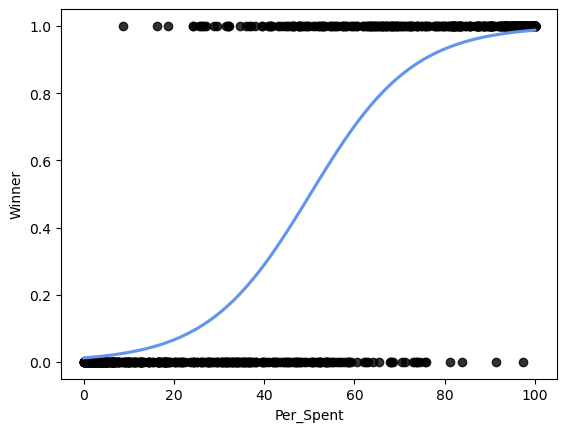

In [26]:
#define the predictor variable and the response variable
x = df_glm['Per_Spent']
y = df_glm['Winner']

#plot logistic regression curve with black points and red line
sns.regplot(x=x, y=y, data=df_glm, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'cornflowerblue'});

In [21]:
df_glm['Winner'].corr(df_glm['Per_Spent'])

0.8134225240093071

In [22]:
df = df_glm

In [23]:
print(df_glm.columns)
cad_spent_logreg = smf.logit("Winner ~ Per_Spent",
                          data = df_glm).fit()

Index(['State', 'District', 'Name', 'Party', 'Incumbent', 'Winner',
       'Vote_Percentage', 'Raised', 'Spent', 'MaxSpentPer',
       'Total_S_Per_District', 'Per_Spent'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.262532
         Iterations 7


In [24]:
cad_spent_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                          Logit   Df Residuals:                      806
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Oct 2023   Pseudo R-squ.:                  0.6203
Time:                        19:50:36   Log-Likelihood:                -212.13
converged:                       True   LL-Null:                       -558.64
Covariance Type:            nonrobust   LLR p-value:                9.852e-153
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4026      0.322    -13.679      0.000      -5.033      -3.772
Per_Spent      0.0877      0.006     15.005      0.000       0.076       0.099
==============================================================================
"""